# Наивный байес

Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных жизненных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

## Блок с используемыми библиотеками

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Блок с описанием и демонстрацией (частичной распечаткой) используемого датасета

In [2]:
data = pd.read_csv('./input/Iris.csv')
speciesTypes = data['Species'].unique()
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Блок с предварительной обработкой датасета

In [5]:
data = data.drop('Id', axis = 1)
species_mapping = {species: idx for idx, species in enumerate(data['Species'].unique())}
data['Species'] = data['Species'].map(species_mapping)
y = data[['Species']].copy()
data = data.drop('Species', axis = 1)

In [6]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data, y.values.ravel(), test_size=0.2, random_state=36)

## Блок с тепловой картой

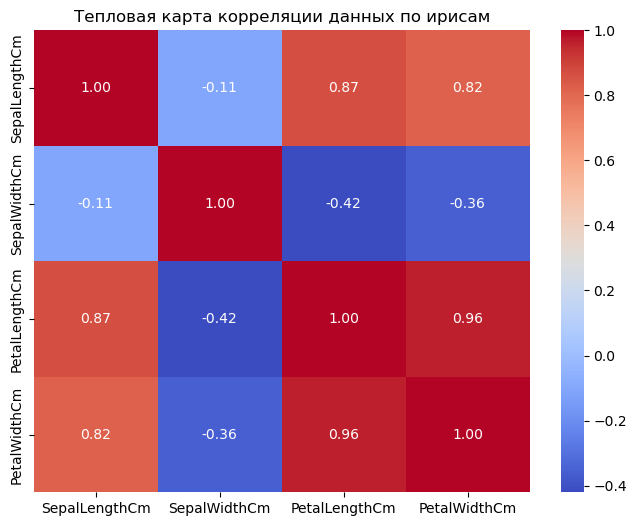

In [9]:
corr = data.corr()

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции данных по ирисам')
plt.show()

## Блок с обучением модели

In [10]:
model = GaussianNB() # гауссовский наивный байес
model.fit(X_train, y_train)

GaussianNB()

## Блок с прогнозами модели

In [11]:
# Предсказываем значения для тестовых данных
y_pred = model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision:", precision)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall:", recall)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f'AUC-ROC: {auc_roc}')

Точность: 0.9333333333333333
Precision: 0.9487179487179488
Recall: 0.9393939393939394
F1 Score: 0.9388888888888888
AUC-ROC: 1.0


In [12]:
y_pred

array([1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 1, 2], dtype=int64)

In [13]:
y_test

array([1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 1, 2], dtype=int64)

## Блок с графиками выходных результатов

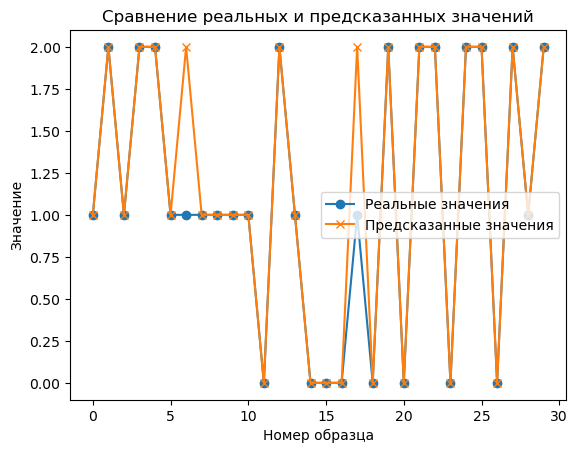

In [15]:
plt.figure()
plt.plot(y_test, label='Реальные значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.xlabel('Номер образца')
plt.ylabel('Значение')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()

## Дополнительно:

In [17]:
# та же история, но с 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() # мультиномиальный наивный байес
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision:", precision)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall:", recall)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f'AUC-ROC: {auc_roc}')

Точность: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9696969696969697
F1 Score: 0.9696342305037957
AUC-ROC: 0.9744816586921851


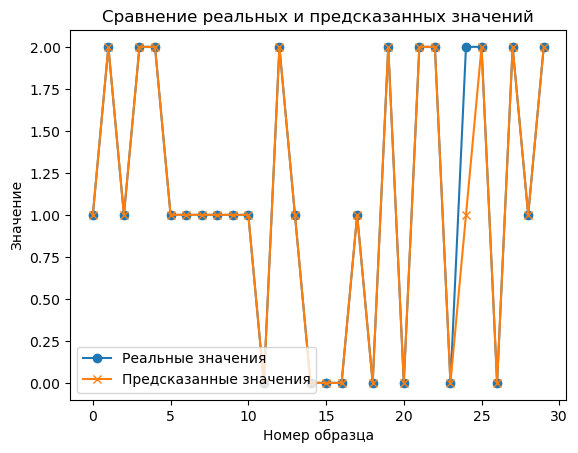

In [19]:
plt.figure()
plt.plot(y_test, label='Реальные значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.xlabel('Номер образца')
plt.ylabel('Значение')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()